In [19]:
import pandas as pd
import dateutil.parser
from datetime import datetime 


In [2]:
df = pd.read_pickle('/Users/chrisjackson/LHL/Final Project/FinalData/AAPlFINAL.pkl')

In [8]:
results = df.iloc[4]['analyzed']

In [15]:
poslist = []
neglist = []
for res in results:
    if res[0]['label'] == 'Positive':
        poslist.append(res[0])
    elif res[0]['label'] == 'Negative':
        neglist.append(res[0])
    

In [17]:
poslist

[{'label': 'Positive', 'score': 0.9934053421020508},
 {'label': 'Positive', 'score': 0.9762821793556213},
 {'label': 'Positive', 'score': 0.9999179840087891},
 {'label': 'Positive', 'score': 0.6074419617652893},
 {'label': 'Positive', 'score': 0.980603039264679}]

In [30]:
df = pd.read_pickle('/Users/chrisjackson/LHL/Final Project/FinalData/APPLFINAL.pkl')
df = df.drop(['analyzed'], axis = 1)
df['newDate'] = df['date'].apply(lambda x: str(dateutil.parser.parse(x).strftime("%Y-%m-%d")) )
df['date'] = df['newDate']
df = df.drop(['newDate'], axis = 1)
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df.sort_values(by='date', inplace=True)
df.reset_index(drop=True)

,date,formType,ticker,dayofyear,positives,negatives,scoreTotal,sentenceCount,score
0,2000-02-01,10-Q,AAPL,032,7,7,0,161,0.000000
1,2000-05-11,10-Q,AAPL,132,0,0,0,0,0.008130
2,2000-07-31,10-Q,AAPL,213,4,3,1,123,0.008130
3,2000-12-14,10-K,AAPL,349,0,0,0,0,0.000000
4,2001-02-12,10-Q,AAPL,043,0,5,-5,107,-0.046729
...,...,...,...,...,...,...,...,...,...
84,2021-04-28,10-Q,AAPL,118,8,2,6,149,0.040268
85,2021-07-27,10-Q,AAPL,208,10,2,8,162,0.049383
86,2021-10-28,10-K,AAPL,301,5,4,1,109,0.009174
87,2022-01-27,10-Q,AAPL,027,3,4,-1,86,-0.011628


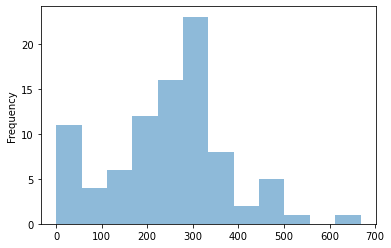

In [37]:
ax = df['sentenceCount'].plot.hist(bins=12, alpha=0.5)

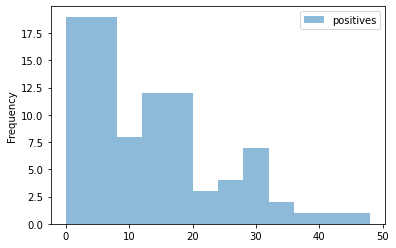

In [40]:
ax = df[['positives']].plot.hist(bins=12, alpha=0.5)

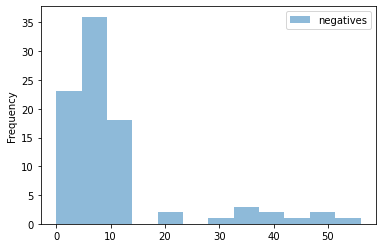

In [41]:
ax = df[['negatives']].plot.hist(bins=12, alpha=0.5)

In [35]:
bins = [0, 100, 200, 300, 400, 500, 600]
temp = pd.cut(df['sentenceCount'], bins)
print (temp)

88    (100.0, 200.0]
87               NaN
86    (100.0, 200.0]
20               NaN
85    (100.0, 200.0]
           ...      
24    (100.0, 200.0]
23    (100.0, 200.0]
0     (100.0, 200.0]
22      (0.0, 100.0]
21    (100.0, 200.0]
Name: sentenceCount, Length: 89, dtype: category
Categories (6, interval[int64, right]): [(0, 100] < (100, 200] < (200, 300] < (300, 400] < (400, 500] < (500, 600]]


In [34]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = df['sentenceCount']
y = df['date']
fig = go.Figure(data=[go.Histogram(x=x)])
fig.show()